In [1]:
import pandas as pd
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import re
plt.style.use('ggplot')

In [94]:
cars = pd.read_csv("cars.csv")

In [95]:
cars["drive"] = cars["drive"].str.strip()
cars["title"] = cars["title"].str.strip()
cars["exter"] = cars["exter"].str.strip()
cars["inter"] = cars["inter"].str.strip()
cars["made"] = cars["made"].str.strip()
cars["model"] = cars["model"].str.strip()
cars["eng"] = cars["eng"].str.strip()
cars["tran"] = cars["tran"].str.strip()
cars["mileage"] = cars["mileage"].str.strip()

In [96]:
len(cars)

56859

In [52]:
cars.head()

,cty,drive,eng,exter,fuel,hwy,inter,made,mileage,model,price,slreview,slrzip,title,tran,year
0,27.0,FWD,Gas I4 1.8L/110,Silver,Gasoline,35.0,NaN,Toyota,"80,135",Corolla,"$6,990",2.1,7834.0,Used 2009 Toyota Corolla LE,Automatic,2009
1,24.0,FWD,Gas I4 2.4L/146,Red,Gasoline,33.0,NaN,Toyota,"157,470",Camry,"$4,390",2.1,7834.0,Used 2006 Toyota Camry LE,5-Speed Automatic w/OD,2006
2,23.0,AWD,2.5L 4-Cylinder DOHC Dual VVT-i,Silver Sky Metallic,Gasoline,30.0,Ash,Toyota,"12,001",RAV4,"$28,997",4.6,6807.0,Used 2018 Toyota RAV4 XLE,6-Speed Automatic,2018
3,17.0,4WD,4.0L V6 SMPI DOHC,Silver Metallic,Gasoline,21.0,Bl Gr Sft Syn Lth,Toyota,5,4Runner,"$37,639",4.6,6807.0,Used 2018 Toyota 4Runner SR5 Premium,5-Speed Automatic with Overdrive,2018
4,13.0,4WD,5.7L V8 DOHC Dual VVT-i 32V,Midnight Black Metallic,Gasoline,18.0,Terra Semi-Aniline Perfor,Toyota,201,Land,"$80,997",4.6,6807.0,Used 2019 Toyota Land Cruiser Base,8-Speed Automatic (ECT-i),2019


In [97]:
cars["price"].replace(["Not Priced","FWD"], None, inplace = True)
cars["price"].replace({'\$': '', ',': ''}, regex=True, inplace = True)
cars["mileage"].replace({',': ''}, regex=True, inplace = True)

In [148]:
cars["mileage"].replace("Not provided", np.NaN, inplace = True)
cars["price"].replace([None, 1], np.NaN, inplace = True)

In [149]:
cars["exter"].fillna("UNKNOW", inplace = True)
cars.dropna(subset = ["price"],inplace = True)
cars.dropna(subset = ["mileage"],inplace = True)
cars.isna().sum()

cty         8295
drive       3380
eng         1742
exter          0
fuel           0
hwy         8295
inter       5519
made           0
mileage        0
model          0
price          0
slreview    4584
slrzip      1170
title          0
tran         992
year           0
dtype: int64

In [100]:
cars["mileage"] = cars["mileage"].astype(int)
cars["price"] = cars["price"].astype(int)

In [101]:
cars.dtypes

cty         float64
drive        object
eng          object
exter        object
fuel         object
hwy         float64
inter        object
made         object
mileage       int64
model        object
price         int64
slreview    float64
slrzip      float64
title        object
tran         object
year          int64
dtype: object

In [102]:
cars["drive"].replace(["4MATIC", "quattro", "Quattro AWD", "Four Wheel Drive", "All Wheel Drive", 
                        "All-Wheel Drive with Locking Differential", "All-Wheel Drive with Locking and Limited-Slip Differential", 
                        "ALL-WHEEL DRIVE", "4x4/4-wheel drive", "Four-Wheel Drive with Locking and Limited-Slip Differential", 
                        "4x4", "4WD", "4MATICA?", "4MATIC AWD", "4MATIC 4WD", "FOUR-WHEEL DRIVE", "Four-Wheel",
                        "4x2","4X2", "4X4", "CVT 7-Speed", "All-wheel Drive"], "AWD", inplace = True)

In [103]:
cars["drive"].replace(["Front-wheel Drive", "FrontTrak", "FRONT-WHEEL DRIVE", "Front Wheel Drive", "2WD", "Unspecified",
                        "Front-Wheel Drive with Limited-Slip Differential", "Front-Wheel Drive"], "FWD", inplace = True)

In [154]:
cars["drive"].replace(["Rear-wheel Drive", "Rear-Wheel Drive with Limited-Slip Differential", "4x2/2-wheel drive", 
                        "Rear-Wheel Drive", "Rear Wheel Drive", "Automatic 8-Speed"], "RWD", inplace = True)
cars.groupby("drive")["title"].count().sort_values(ascending = False)

drive
AWD    30621
FWD    17806
RWD     4796
Name: title, dtype: int64

In [105]:
cars.loc[cars["exter"].str.contains("White"), "exter"] = "White"
cars.loc[cars["exter"].str.contains("Black"), "exter"] = "Black"
cars.loc[cars["exter"].str.contains("Silver"), "exter"] = "Silver"
cars.loc[cars["exter"].str.contains("Blue"), "exter"] = "Blue"
cars.loc[cars["exter"].str.contains("Red"), "exter"] = "Red"
cars.loc[cars["exter"].str.contains("Gray"), "exter"] = "Gray"
cars.loc[cars["exter"].str.contains("Yellow"), "exter"] = "Yellow"
cars.loc[cars["exter"].str.contains("Brown"), "exter"] = "Brown"
cars.loc[cars["exter"].str.contains("Grey"), "exter"] = "Gray"

In [106]:
scatter_df = cars.loc[(cars["year"]>2000) & (cars["made"] == "Mercedes-Benz")]
scatter_df = scatter_df[["year", "price"]]

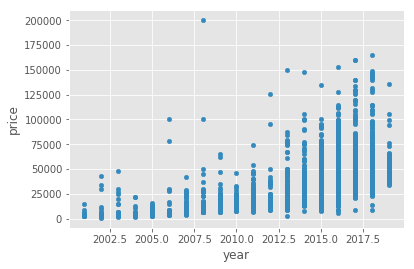

In [107]:
scatter_df.plot.scatter(x = "year", y = "price")

In [108]:
scatter_df1 = cars.loc[(cars["mileage"]<200000) & (cars["price"]<300000) & (cars["made"] == "Chevrolet")]
scatter_df1 = scatter_df1[["price", "mileage"]]

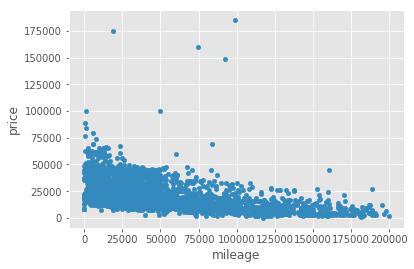

In [109]:
scatter_df1.plot.scatter(x = "mileage", y = "price")

In [110]:
cars.groupby("made")["title"].count().sort_values(ascending = False)

made
Nissan           4927
BMW              4880
Honda            4863
Ford             4745
Toyota           4708
Mercedes-Benz    4523
Chevrolet        3648
Jeep             3236
Hyundai          1867
Lexus            1836
Audi             1689
Volkswagen       1663
Dodge            1527
Subaru           1422
Acura            1367
INFINITI         1355
Kia              1117
GMC               939
Cadillac          889
Mazda             844
Porsche           621
Land              608
Volvo             570
Chrysler          551
RAM               540
Lincoln           513
Buick             406
Mitsubishi        231
MINI              217
Maserati          139
Jaguar            104
Scion              41
Ferrari            18
Bentley             1
Name: title, dtype: int64

In [150]:
t10cars = cars.loc[cars["made"].isin(["Nissan","Honda", "BMW", "Ford", "Toyota", "Mercedes-Benz", "Chevrolet", "Jeep",
                           "Hyundai", "Lexus"]) & (cars["year"] > 2000)]

In [151]:
t10cars.shape

(38982, 16)

In [113]:
t10cars.groupby("made")[["price"]].mean().sort_values(by="price", ascending = False)

,price
made,
Mercedes-Benz,34603.826058
BMW,29424.919630
Lexus,27288.851507
Jeep,21873.877057
Chevrolet,20955.259755
Ford,20065.531702
Toyota,19313.318688
Honda,17009.376883
Nissan,15584.637991


In [114]:
t10cars.groupby("made")[["mileage"]].mean().sort_values(by="mileage", ascending = False)

,mileage
made,
Ford,54470.190426
Honda,50259.992570
Toyota,48668.867338
Jeep,47938.576529
Chevrolet,47103.228261
Hyundai,46147.990894
Nissan,46064.364246
Lexus,45696.877260
BMW,44748.582323


In [115]:
cars.loc[cars["year"]<2000].shape

(297, 16)

In [146]:
t10 = t10cars[t10cars.groupby("year").price.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
t10 = t10[t10.groupby("year").mileage.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]

In [161]:
t10.shape

(37985, 16)

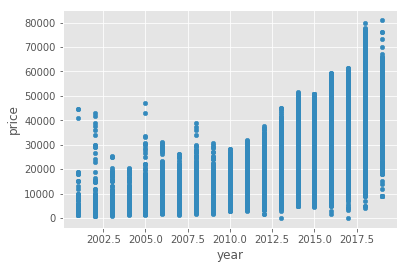

In [160]:
t10.plot.scatter(x = "year", y = "price")

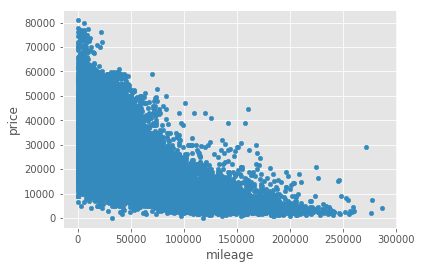

In [159]:
t10.plot.scatter(x = "mileage", y = "price")

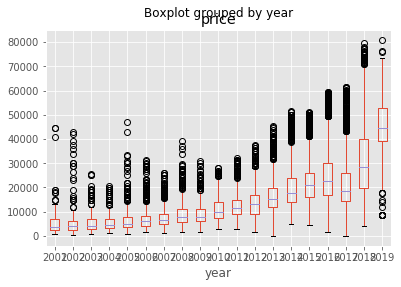

In [158]:
t10.boxplot(by = 'year', column = 'price')

In [164]:
to10 = t10.drop(t10.loc[t10["price"] == 1].index)

In [165]:
t10.to_csv("t102.csv",index=False)

In [121]:
myear = t10['year'] == 2006
mprice = t10['price'] > 10000
mmade = t10['made'] == "Honda"
t10.loc[myear & mprice & mmade]

,cty,drive,eng,exter,fuel,hwy,inter,made,mileage,model,price,slreview,slrzip,title,tran,year
162,26.0,FWD,2.4L I4 16V MPFI DOHC,UNKNOW,Gasoline,34.0,NaN,Honda,139022,Accord,22995,3.3,6830.0,Used 2006 Honda Accord LX,5-Speed Automatic,2006
240,26.0,FWD,4 Cylinder,Black,Gasoline,34.0,NaN,Honda,124405,Accord,31300,4.7,7730.0,Used 2006 Honda Accord SE,Manual,2006
962,19.0,FWD,3.5L V6 Cylinder Engine,Gray,Gasoline,25.0,NaN,Honda,129970,Odyssey,15995,5.0,8840.0,Used 2006 Honda Odyssey EX,NaN,2006
16946,NaN,AWD,3.5L V6 CYLINDER,Gray,Gasoline,NaN,Gray,Honda,83163,Ridgeline,13575,3.8,8882.0,Used 2006 Honda Ridgeline RTL with MOONROOF,5-Speed Automatic,2006
17747,19.0,FWD,3.5L V6 24V MPFI SOHC,Gray,Gasoline,25.0,NaN,Honda,203690,Odyssey,14500,3.1,11101.0,Used 2006 Honda Odyssey EX,5-Speed Automatic,2006
17883,17.0,AWD,Gas V6 3.5L/212,UNKNOW,Gasoline,22.0,NaN,Honda,153978,Pilot,20995,4.9,7631.0,Used 2006 Honda Pilot EX-L,5-Speed Automatic w/OD,2006


In [122]:
t10.groupby("made")["title"].count().sort_values(ascending = False)

made
Nissan           4862
Honda            4810
BMW              4757
Toyota           4617
Ford             4569
Mercedes-Benz    4050
Chevrolet        3482
Jeep             3190
Hyundai          1851
Lexus            1797
Name: title, dtype: int64

In [692]:
t10.groupby("made")["title"].count().sort_values(ascending = False)

made
Nissan           4867
Honda            4833
BMW              4768
Toyota           4636
Ford             4588
Mercedes-Benz    4070
Chevrolet        3494
Jeep             3214
Hyundai          1864
Lexus            1803
Name: title, dtype: int64

In [693]:
t10.loc[t10["made"] == "Honda"].groupby("model")["title"].count().sort_values(ascending = False)

model
Accord       1501
CR-V         1038
Civic        1010
Pilot         532
Odyssey       477
HR-V          115
Fit            84
Ridgeline      33
Crosstour      12
Element        11
Insight         6
CR-Z            5
S2000           4
Clarity         3
EX              2
Name: title, dtype: int64

In [162]:
t10 = t10.assign(age = 2019 - t10["year"])

In [124]:
honda = t10.loc[t10["made"] == "Honda"][["age", "mileage", "price", "model"]]
honda.shape

(4810, 4)

In [125]:
honda = honda[honda.groupby("age").price.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
honda = honda[honda.groupby("age").mileage.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
honda.shape

(4717, 4)

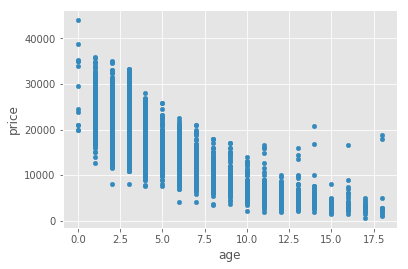

In [126]:
honda.plot.scatter(x = "age", y = "price")

In [127]:
honda = pd.get_dummies(honda)

In [130]:
X.head()

,age,mileage,model_Accord,model_CR-V,model_CR-Z,model_Civic,model_Clarity,model_Crosstour,model_EX,model_Element,model_Fit,model_HR-V,model_Insight,model_Odyssey,model_Pilot,model_Ridgeline,model_S2000
143,3,15053,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
144,3,26684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145,3,44096,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
146,2,18688,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
147,1,21353,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [129]:
X = honda.drop("price", axis = 1)

In [131]:
X =  X.assign(agesqrt = X.age**2)

In [132]:
y = honda["price"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [134]:
X_train.head()

,age,mileage,model_Accord,model_CR-V,model_CR-Z,model_Civic,model_Clarity,model_Crosstour,model_EX,model_Element,model_Fit,model_HR-V,model_Insight,model_Odyssey,model_Pilot,model_Ridgeline,model_S2000,agesqrt
15979,13,110455,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,169
15888,3,38346,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9
183,3,23136,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9
14756,5,59119,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,25
14940,8,91269,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,64


In [135]:
lm = linear_model.LinearRegression()

In [136]:
model = lm.fit(X_train,y_train)

In [137]:
model.score(X_test,y_test)

0.8268982313178191

In [138]:
y_pre = model.predict(X_train)

In [139]:
y_pre[0:5]

array([ 9538.5123868 , 20369.11972553, 21132.36617267, 18604.61400241,
        6135.02835442])

In [140]:
y_train[0:5]

15979     5995
15888    17995
183      13990
14756    16995
14940     6795
Name: price, dtype: int64

In [141]:
model.coef_

array([-2.20026296e+03, -5.01805685e-02, -2.65325455e+03, -1.07318353e+02,
       -4.57132335e+03, -4.05468772e+03,  1.52674941e+03,  1.15473732e+03,
        1.15301518e+03,  4.42094464e+02, -4.92858277e+03, -2.92723526e+03,
       -5.39458177e+03,  2.33642815e+03,  4.76073156e+03,  4.74080795e+03,
        8.52241973e+03,  7.71671645e+01])

In [168]:
model.coef_[-1]

77.16716452507974

In [142]:
model.coef_[0] + model.coef_[-1]

-2123.0957907043767

In [167]:
model.intercept_

28306.946543350023

In [144]:
RMSE = np.sqrt(mean_squared_error(y_train, y_pre))
RMSE

2677.6935890076024